In [65]:
#https://tsplib95.readthedocs.io/en/stable/index.html source
#https://github.com/rhgrant10/tsplib95

import tsplib95
import random

# load TSPLIB file: Just remove the # from the file you want and comment out the others
#tsp = tsplib95.load('Berlin.tsp')
#tsp = tsplib95.load('KroA100.tsp')
tsp = tsplib95.load('pr1002.tsp')

nodes = list(tsp.get_nodes()) # retrive all cities

# calculate the euclidean distance between nodes
# empty dictionary to store the distances between nodes and every other nodes
dist = {}
for i in tsp.get_nodes():
    dist[i] = {}
    for j in tsp.get_nodes():
        #weight is the Euclidean distance
        dist[i][j] = tsp.get_weight(i, j) #store distance between node i and j



In [67]:
#https://docs.python.org/3/library/random.html

#creates an initial random permutation that can be used to make a population
def initial_individual(nodes): 
    individual=nodes[:]
  
    random.shuffle(individual) # randmoly shuffle cities in individual
   
    return individual


In [69]:
#create an initial population with a given size'.
# each individual is a permutation of nodes generated in the function initial_individual(nodes):

def initialize_population(size, nodes):
  inital_pop=[] # list to store the inital population
  for i in range(size): # loops until we get the  population size we want
      inital_pop.append(initial_individual(nodes)) # add to list
  return(inital_pop)


In [71]:
# calculates the total length of a path of an individual
#https://docs.python.org/3/library/functions.html

def distance(individual,dist):
     total = 0
     for i in range (len(individual)):
          current_node = individual[i]

          if i ==len(individual) - 1: # when we reach the end of the path we add the distance back to the first city
               next_node = individual[0]
               total += dist[current_node][next_node]
        
          else:
               next_node = individual[i+1]
               total += dist[current_node][next_node]
     return total # returns the total distance it takes to visit every city following this path

          



In [72]:
# fitness function takes an individual(path) and returns the its total distance by calling the distance() function
def fitness(individual,dist):
    fit = distance(individual,dist)
    return fit

In [73]:
#https://en.wikipedia.org/wiki/Tournament_selection
#performs tornament selection 
def tournament_selection(population , dist , k): # the value of k determines the number of individuals that are selected for tournament 
    best = random.choice(population) # randomly select individuals from population
    best_fit = fitness (best , dist) # compute first candidates fitness

    for i in range(k-1): # deduct one since we have already selected the first candidate
        candidate = random.choice(population)
        f = fitness(candidate, dist) # calculate the fitness

        if f < best_fit:
           best_fit = f
           best = candidate
   


    return best # returns the individual with the greatest fitness ,in this case the lower value

In [74]:
#https://www.youtube.com/watch?v=7hDZyH2E4Yw
#https://docs.python.org/3/library/functions.html
#https://en.wikipedia.org/wiki/Crossover_(evolutionary_algorithm)
#Geneticalgorithms_Lugeretal.pdf -Lecture notes

import random
import numpy as np



def ordered_crossover(parent1, parent2, k): # k is the crossover segment that will be swapped between the two parents
    # set n to be the value of an individual
    n = len(parent1)

    # when I introduce this later for over 1000 cities numpy array this will allow me faster look ups O(1)-
    #-1 represent unfilled positions
    child1 = np.full(n, -1, dtype=np.int32)
    child2 = np.full(n, -1, dtype=np.int32)

    

    
    

    # Get a random starting index that ensures the sequence fits by bring it back k indexes
    # generate random crossover start point 
    # end point will be start index + k 
    start_index = random.randint(0, n - k)  #  ensure we dont go out of bounds
    end_index = start_index + k  # Correct the end index

    # extract the subsequence
    random_sequence1 = parent1[start_index:end_index]  # Given to child2
    random_sequence2 = parent2[start_index:end_index]  # Given to child1

    # place the selected subsequences into the corresponding positions in child1 and child2
    for i in range(k):
        child1[start_index + i] = random_sequence2[i]
        child2[start_index + i] = random_sequence1[i]

    # function fills in the rest of child1 and child2 that werent filled by k segments while avoiding duplicates
    def fill_remaining(child, parent):

        child_filled = set(filter(lambda x: x != -1, child))  # creates set of already filled positions, those not equal to -1
        current_index = 0  # Start filling from the beginning

        for i in range(len(parent)):
            if child[i] == -1:  # only fill empty slots
                while parent[current_index] in child_filled:
                    current_index += 1  # skip duplicates
                
                child[i] = parent[current_index]  # fill the empty slot
                child_filled.add(parent[current_index])  # mark as used
                current_index += 1  # Move forward

    # fill the remaining elements in child1 and child2
    fill_remaining(child1, parent1)
    fill_remaining(child2, parent2)

    # convert NumPy arrays to lists for printing
    child1 = child1.tolist()
    child2 = child2.tolist()

    return child1, child2  

# Calling the function
#child1, child2 = ordered_crossover(parent1, parent2, k)





In [75]:
#https://www.youtube.com/watch?v=EZg-l2FF-JM&t=4s
#https://en.wikipedia.org/wiki/Crossover_(evolutionary_algorithm)#Partially_mapped_crossover_(PMX)

def pmx_crossover(parent1, parent2): # Partially mapped crossover, takes two arguments parent 1 and parent 2 and returns offspring child 1 and child 2
    n = len(parent1)
  # select two crossover points unlike my code in ordered crossover segment size is random
    start_index = random.randint(0, n - 2) # ensure space for end_index
    end_index = random.randint(start_index + 1, n - 1)
    
    # initialize children
    child1 = np.full(n, -1, dtype=int)
    child2 = np.full(n, -1, dtype=int)
    
    # add segments from the parents to child
   
    child1[start_index:end_index + 1] = parent1[start_index:end_index + 1] 
    child2[start_index:end_index + 1] = parent2[start_index:end_index + 1]
    
    #  Create mappings for the swapped values between the parents to keep track
    mapping1 = {}  # maps parent 1 segments values to parent 2
    mapping2 = {}  # maps parent 2 segments values to parent 1

    #fills mapping 1 with values from parent 1 mapped to corresponding values from parent 2
    #fills mapping 2 with the reverse mapping.
    
    for i in range(start_index, end_index + 1):
        mapping1[parent1[i]] = parent2[i] # fills mapping 1 with values from parent 1 mapped to corresponding values from parent 2
        mapping2[parent2[i]] = parent1[i]  # fills mapping 2 with the reverse mapping

    # function to find the postions that are left over
    def fill_child(child, parent, mapping):
        for i in range(n): # chromosome length
            if child[i] == -1:  # only fill empty positions
                value = parent[i]
                # If value is already in child we look at the map to get the value that it maps to.Iterates until one is found thats thats not already there
                while value in child:
                    value = mapping.get(value, value)
                child[i] = value

    # fill the remaining positions not already filled  
    """ Here I am calling the fill child function twice which passes child 1
     and parent2. child 1 has already been partially filled with values from
     parent 1 and the mapping has been done.
    """

    fill_child(child1, parent2, mapping1)
    fill_child(child2, parent1, mapping2)
    
    return child1, child2 # returns the new offspring



In [76]:
#Geneticalgorithms_Lugeretal.pdf -Lecture notes
def inversion_mutation(individual): # mutates chromosome by inverting random section of genes from an individual
    r1 = random.randint(0, len(individual) - 1)
    r2 = random.randint(0, len(individual) - 1)

    # ensure r1 < r2 by swapping if needed
    if r1 > r2:
        r1, r2 = r2, r1

    # if r1 and r2 are equal adjust one of them
    if r1 == r2:
        if r2 < len(individual) - 1:
            r2 = r2 + 1  # increase r2
        elif r1 > 0:
            r1 = r1 - 1  # or decrease r1

    individual[r1:r2 + 1] = individual[r1:r2 + 1][::-1]
    return individual


In [23]:
#Geneticalgorithms_Lugeretal.pdf -Lecture notes
def shift_mutation(individual): # randomly selects a gene and randomly places it a new postion in chromosome

    if isinstance(individual, np.ndarray): # converted to a list so list operations pop() and insert() can be used
        individual = individual.tolist()
    j=0
    i=0
    while j==i: #ensuring i and j are not equal and a mutation occurs because nothing would change
        i = random.randint(0, len(individual) - 1) # i is the city to be moved in the path
        j = random.randint(0, len(individual)-1) # location of the city after it has been moved

    value = individual.pop(i) # remove element at index i
    individual.insert(j, value) # insert element at index j

    return np.array(individual)

    

In [77]:
#https://stackoverflow.com/questions/3419984/print-to-the-same-line-and-not-a-new-line
#https://docs.python.org/3/library/random.html#random.random



import random
import matplotlib.pyplot as plt

def genetic_algorithm(pop_size, max_generations, crossover_prob, mutation_prob, nodes, dist, tournament_size, elite_rate):
    # Initialize population by calling initialize_population() 
    population = initialize_population(pop_size, nodes)
    
    best_solution = None # initall there is no best solution
    best_fitness = float('inf') # set to infinity initially to ensure so first generations fitness will be greater,i.e a lower value
    fitness_history = []  # list to store best fitness of each generation
    k = int(0.25 * len(nodes)) # k , the segment for ordered crossover will be 25% the length of an individual or number of nodes
    
    
    for gen in range(max_generations): #loops max_generation times which is specified in the genetic_algorithm() call
        new_population = []
        
        # Evaluate fitness for current population
        # change name to pop_fitness
        fitnesses = [fitness(individual, dist) for individual in population]
        
       #calculate the number of elite(best) individuals to carry over to the next generation
       # This is determined by the multiplying the population size by the elite_rate specified in the genetic_algorithm() call
        elite_count = max(1, int(elite_rate * pop_size)) # even if the elite_rate is set to 0 at least one individual will be carried over to the next generation
        # create a list of tuples (individual, fitness) and sort them (lower fitness is better)
        sorted_pop = sorted(zip(population, fitnesses), key=lambda x: x[1]) #place those with greater fitness/lower first in  sorted list
        elite_individuals = []
        for ind, fit in sorted_pop[:elite_count]: # extract first elite_count individuals,fitness of individuals is discared
              elite_individuals.append(ind) # add to elite_individuals list
        # -----------------------------------------------------------
        
        # make a new population using tournment selection, crossover, and mutation.
        #loop runs until until new_population + elite_count is equal to pop_size
        while len(new_population) < pop_size - elite_count:
            # useing the selection method, tournament_selection , called twice to select two parents
            #
            parent1 = tournament_selection(population, dist, tournament_size)
            parent2 = tournament_selection(population, dist, tournament_size)
            
            # Crossover: with probability crossover_prob, use one of your two operators

            # if a random number generated is less than the specifed crossover_prob defined in the GA function call than crossover occurs
            # if a random number is less than 0.5 we use ordered crossover , otherwise use partially mixed crossover
            # I have tweaked it in favour of ordered crossover as I found it give better solutions


            if random.random() < crossover_prob:
                if random.random() < 0.75:
                    # k ,the segment cut has been set to a fraction of the length of an individual ,len(nodes)
                    offspring1, offspring2 = ordered_crossover(parent1, parent2, k) #offspring 1,2 are the result of crossover between parent 1 and 2
                else:
                    offspring1, offspring2 = pmx_crossover(parent1, parent2)
            else:
                # no crossover ,make copies of the parents.
                offspring1, offspring2 = parent1[:], parent2[:]
            
            
            #random.ranom() will return a random float between 0.0 and 1.0
            if random.random() < mutation_prob: #apply mutation operators with probability mutation_prob specified in the GA function call
                if random.random() < 0.5:
                    offspring1 = inversion_mutation(offspring1)
                else:
                    offspring1 = shift_mutation(offspring1)
            if random.random() < mutation_prob:
                if random.random() < 0.5:
                    offspring2 = inversion_mutation(offspring2)
                else:
                    offspring2 = shift_mutation(offspring2)
            
            new_population.extend([offspring1, offspring2])
        # ensure new_population is no larger than pop_size
        new_population = new_population[:pop_size - elite_count]
        
        # combine elite individuals with new offspring to form the next generation.
        population = elite_individuals + new_population
        
        # evaluate fitness for the new population.
        fitnesses = [fitness(individual, dist) for individual in population]
        current_best = min(fitnesses)# minimum distance is optimal 
        if current_best < best_fitness: # check to see if we need to update best fitness
            best_fitness = current_best #update current best
            best_solution = population[fitnesses.index(current_best)]
        #Add the best fitness value from the current generation to the fitness_history list
        fitness_history.append(best_fitness)
        #Print the current generation and best fitness in a single updating line
        print(f"Generation {gen}/{max_generations}  Best Fitness = {best_fitness}", end='\r', flush=True)  
    
    return best_solution, best_fitness,fitness_history #return the best path we found,its fitness and fitness history over generations for plotting


In [84]:
import time

clock_start = time.time() # start clock

#REMOVE """" TO USE PROMPTS FOR INPUT INSTEAD
"""Prompt to enter parameters 
   pop_size = int(input("Enter population size "))
   max_generations = int(input("Enter maximum generations "))
   crossover_prob = float(input("Enter crossover probability "))
   mutation_prob = float(input("Enter mutation probability "))
   tournament_size = int(input("Enter tournament size "))
   elite_rate = float(input("Enter elite rate "))
"""

# COMMENT OUT IF YOU WANT TO USE INPUT PROMPTS
pop_size = 500
max_generations = 80
crossover_prob = 0.3
mutation_prob = 0.3
tournament_size = 4
elite_rate = 0.05



## run genetic_algorithm
best_path, best_fit,fitness_history = genetic_algorithm(pop_size=pop_size,  max_generations=max_generations, crossover_prob=crossover_prob, mutation_prob=mutation_prob, nodes=nodes,tournament_size=tournament_size,elite_rate=elite_rate, dist=dist)

clock_end = time.time()# stop clock
#outputs the best path found and its fiitness, will print over the generation print
print("Best Individual (Path):", best_path)
print("Fitness of Best Individual:", best_fit)
print("Computation Time: ",clock_end - clock_start) 
best_Graph = best_fit #



#uncomment to take prompts
#best_tour, best_fit = genetic_algorithm2(pop_size=pop_size,  max_generations=max_generations, crossover_prob=crossover_prob, mutation_prob=mutation_prob, nodes=nodes, dist=dist,tournament_size=tournament_size,elite_rate=elite_rate)
#print("Best tour found:", best_tour)
#print("Best tour distance:", best_fit)







Best Individual (Path): [876, 229, 277, 813, 837, 600, 702, 151, 159, 225, 43, 25, 558, 439, 959, 684, 1002, 848, 839, 857, 290, 79, 565, 844, 826, 567, 809, 804, 805, 579, 270, 463, 825, 889, 131, 363, 801, 364, 789, 706, 534, 800, 564, 792, 960, 730, 749, 727, 750, 257, 442, 292, 462, 289, 279, 332, 840, 699, 696, 281, 181, 161, 120, 807, 554, 867, 883, 1001, 786, 502, 100, 134, 37, 60, 650, 250, 317, 228, 631, 12, 385, 616, 597, 223, 672, 972, 822, 362, 346, 705, 477, 201, 331, 396, 987, 198, 849, 570, 547, 227, 202, 67, 178, 834, 561, 904, 485, 866, 85, 82, 347, 613, 951, 877, 899, 18, 353, 380, 247, 21, 50, 664, 124, 744, 392, 351, 431, 728, 217, 209, 925, 629, 126, 611, 885, 538, 609, 232, 237, 340, 5, 129, 190, 710, 231, 367, 397, 297, 175, 136, 640, 220, 365, 327, 69, 48, 51, 150, 83, 808, 768, 779, 964, 909, 349, 342, 258, 195, 101, 287, 943, 777, 918, 830, 235, 77, 325, 795, 869, 378, 642, 116, 504, 333, 93, 330, 144, 448, 475, 416, 956, 966, 917, 927, 853, 906, 402, 741, 993

Computation Time:  145.29261183738708


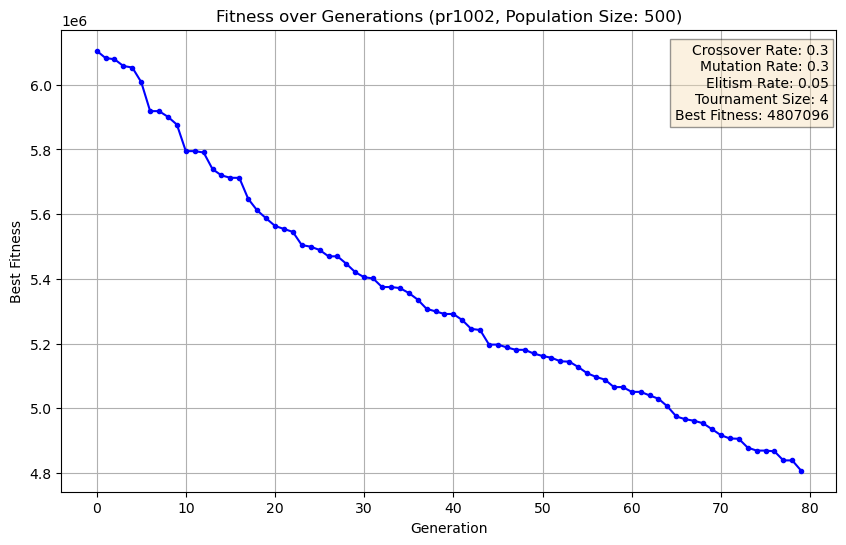

In [85]:
 #https://stackoverflow.com/questions/17086847/box-around-text-in-matplotlib
 #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html
 #https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html
 #https://docs.python.org/3/library/time.html



print("Computation Time: ",clock_end - clock_start) 
box_text = f"Crossover Rate: {crossover_prob}\nMutation Rate: {mutation_prob}\nElitism Rate: {elite_rate}\nTournament Size: {tournament_size}\nBest Fitness: {best_fit}"


# Set properties of bounding box
props = dict(boxstyle='square', facecolor='wheat', alpha=0.4)



# Plotting the fitness over generations
plt.figure(figsize=(10, 6))
plt.plot(fitness_history, marker='.', linestyle='-', color='b')
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title(f"Fitness over Generations ({tsp.name}, Population Size: {pop_size})")
#set coordinates(0,0 bottom left)
#transform=plt.gca() gets current axis coordinate and transforms them to 0.99, 0.97
plt.text(0.99, 0.97, box_text, transform=plt.gca().transAxes,fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=props)


plt.grid(True)
plt.show()